In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [92]:
df = pd.read_csv('netflix1.csv')

In [93]:
df.sample(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4378,s6107,Movie,Aisa Yeh Jahaan,Biswajeet Bora,India,10/15/2017,2015,TV-14,127 min,"Dramas, Independent Movies, International Movies"
4911,s6777,Movie,For Colored Girls,Tyler Perry,United States,5/1/2020,2010,R,134 min,Dramas
54,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...",Not Given,9/17/2021,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies"
1466,s1666,Movie,40 Sticks,Victor Gatonye,Kenya,11/20/2020,2019,TV-14,93 min,"International Movies, Thrillers"
2463,s3154,Movie,Okafor's Law,Omoni Oboli,Nigeria,12/13/2019,2016,TV-14,110 min,"Comedies, International Movies, Romantic Movies"


## Data preparation

In [94]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [95]:
df.duplicated().sum()

np.int64(0)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [97]:
df['date_added']=pd.to_datetime(df['date_added'])

In [98]:
df.rename(columns={'listed_in':"category"},inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   country       8790 non-null   object        
 5   date_added    8790 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 686.8+ KB


In [100]:
df.drop(columns=['show_id'],inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   object        
 8   category      8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 618.2+ KB


In [102]:
# Extract movie duration (in minutes)
df["movie_duration"] = df["duration"].str.extract(r"(\d+) min").astype(float)

# Extract number of seasons for TV Shows
df["num_seasons"] = df["duration"].str.extract(r"(\d+) Season").astype(float)


In [103]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            8790 non-null   object        
 1   title           8790 non-null   object        
 2   director        8790 non-null   object        
 3   country         8790 non-null   object        
 4   date_added      8790 non-null   datetime64[ns]
 5   release_year    8790 non-null   int64         
 6   rating          8790 non-null   object        
 7   duration        8790 non-null   object        
 8   category        8790 non-null   object        
 9   movie_duration  6126 non-null   float64       
 10  num_seasons     2664 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 755.5+ KB


,type,title,director,country,date_added,release_year,rating,duration,category,movie_duration,num_seasons
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,90.0,NaN
1,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",NaN,1.0
2,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",NaN,1.0
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0,NaN
4,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8785,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",NaN,2.0
8786,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,NaN,3.0
8787,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",NaN,1.0
8788,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,Kids' TV,NaN,1.0


## Data Analysis

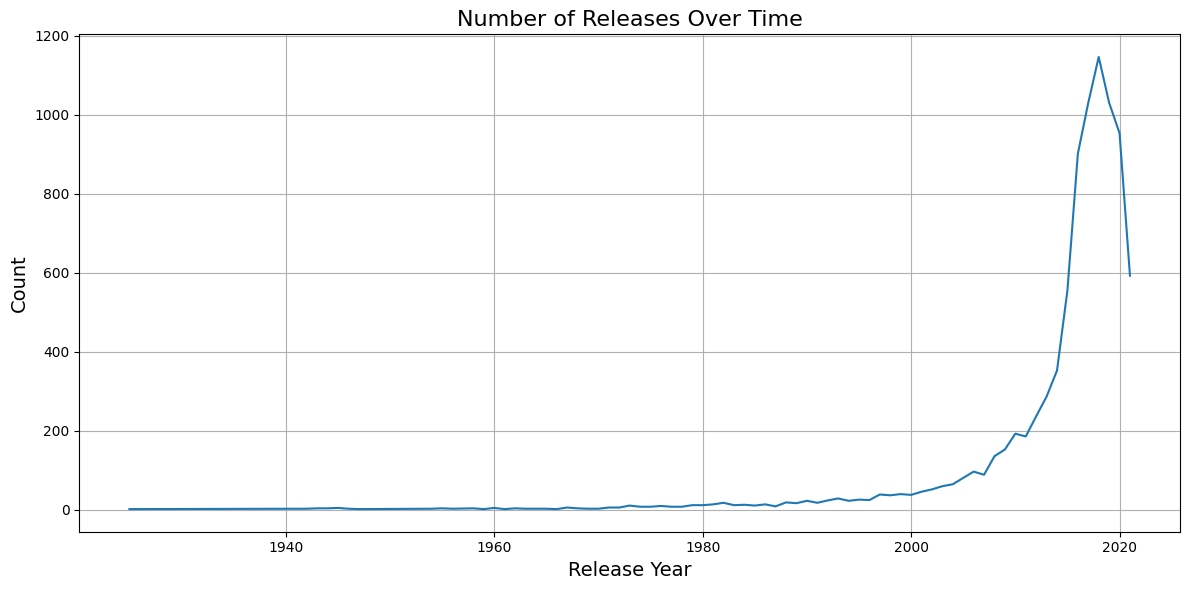

In [104]:
# Number of releases per year
plt.figure(figsize=(12,6))

release_counts=df['release_year'].value_counts().sort_index()
sns.lineplot(
    x=release_counts.index,
    y=release_counts.values,
)
plt.xlabel('Release Year', size=14)
plt.ylabel('Count',size=14)
plt.title("Number of Releases Over Time",size=16)
plt.grid(True)
plt.tight_layout()
plt.show()

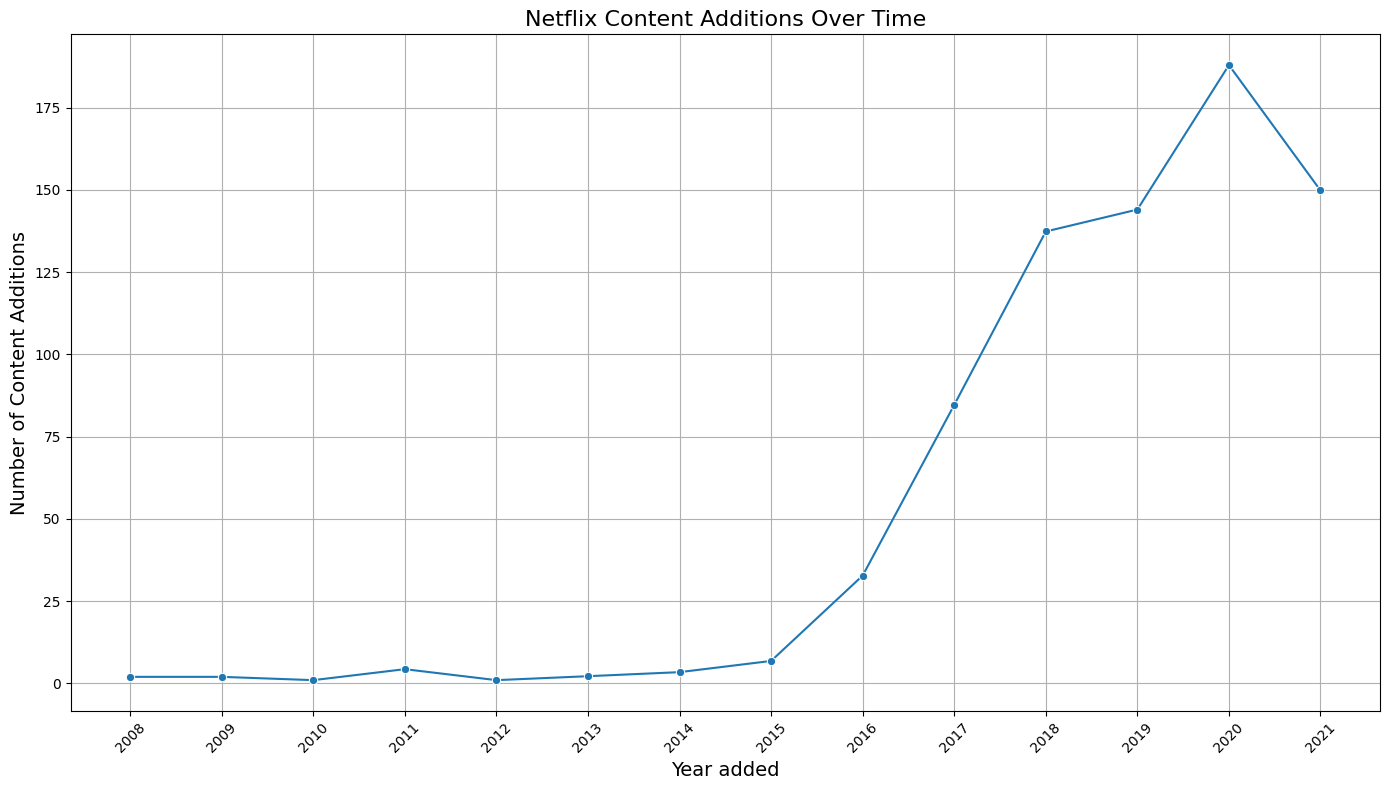

In [105]:
df['year_added'] = df['date_added'].dt.year

rating_trends = df.groupby(['year_added', 'rating'])['title'].count().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='year_added', 
    y='count', 
    data=rating_trends, 
    marker='o',
    errorbar=None

)
plt.title('Netflix Content Additions Over Time', size=16)
plt.xlabel('Year added', size=14)
plt.ylabel('Number of Content Additions', size=14)
plt.xticks(rotation=45)

# Set x-ticks for every year
years = sorted(rating_trends['year_added'].unique())  # Get unique years
plt.xticks(years, rotation=45)  # Set ticks for every year and rotate labels
plt.grid(True)
plt.tight_layout()
plt.show()

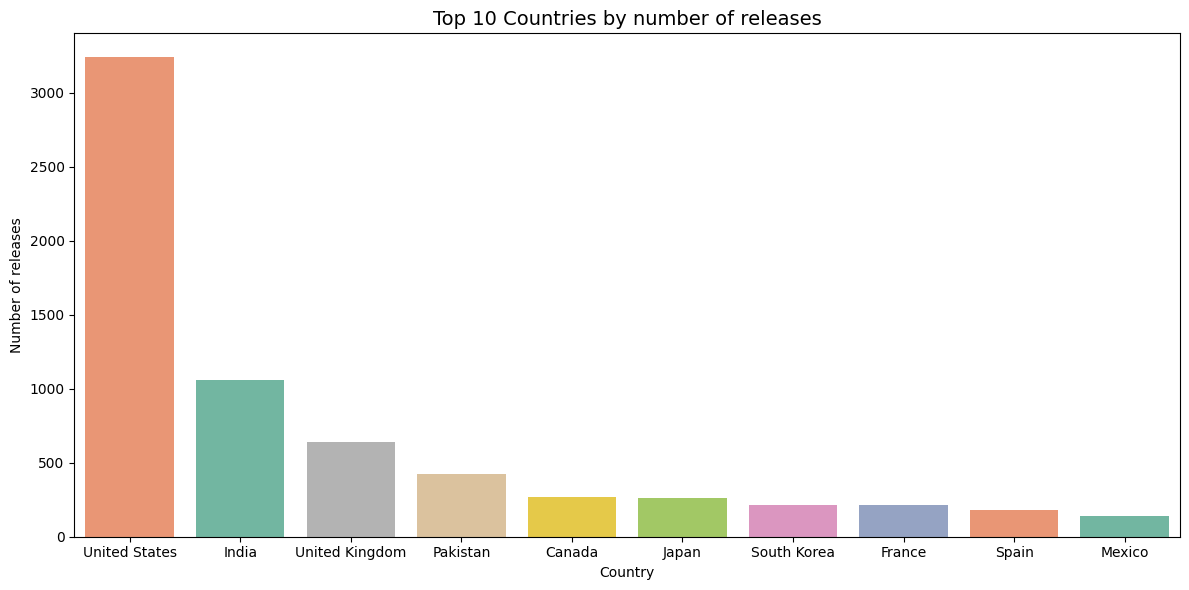

In [106]:
# Top 10 countries by number of releases

plt.figure(figsize=(12,6))
data = df[df['country'] != 'Not Given']['country'].value_counts().head(10)

sns.barplot(
    x=data.index,
    y=data.values,
    palette='Set2',
    hue=data.values,
    legend=False
)

plt.title('Top 10 Countries by number of releases',size=14)
plt.xlabel("Country")
plt.ylabel("Number of releases")
plt.tight_layout()
plt.show()

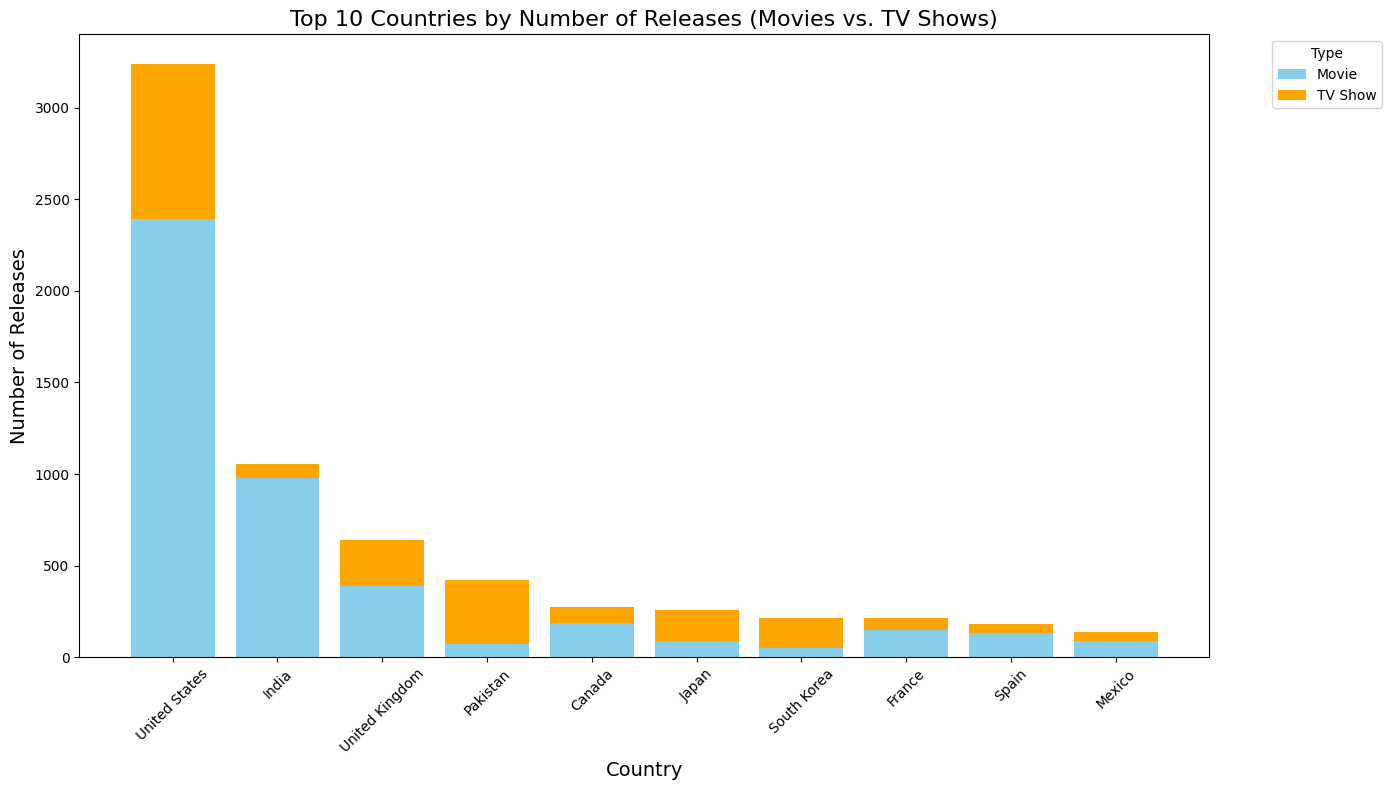

In [107]:
# Group by country and type, and count the number of releases
country_type_counts = df.groupby(['country', 'type']).size().unstack(fill_value=0)
country_type_counts = df[df['country'] != 'Not Given'].groupby(['country', 'type']).size().unstack(fill_value=0)

# Calculate the total releases per country and get the top 10 countries
country_type_counts['total'] = country_type_counts.sum(axis=1)  # Sum across Movie and TV Show
top_10_countries = country_type_counts.nlargest(10, 'total').reset_index()     # Get top 10 countries


plt.figure(figsize=(14, 8))

plt.bar(
    top_10_countries['country'], 
    top_10_countries['Movie'], 
    label='Movie', 
    color='skyblue'
)

plt.bar(
    top_10_countries['country'], 
    top_10_countries['TV Show'], 
    bottom=top_10_countries['Movie'],  # Stack TV Shows on top of Movies
    label='TV Show', 
    color='orange'
)

plt.title('Top 10 Countries by Number of Releases (Movies vs. TV Shows)', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Number of Releases', size=14)

plt.xticks(rotation=45)
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

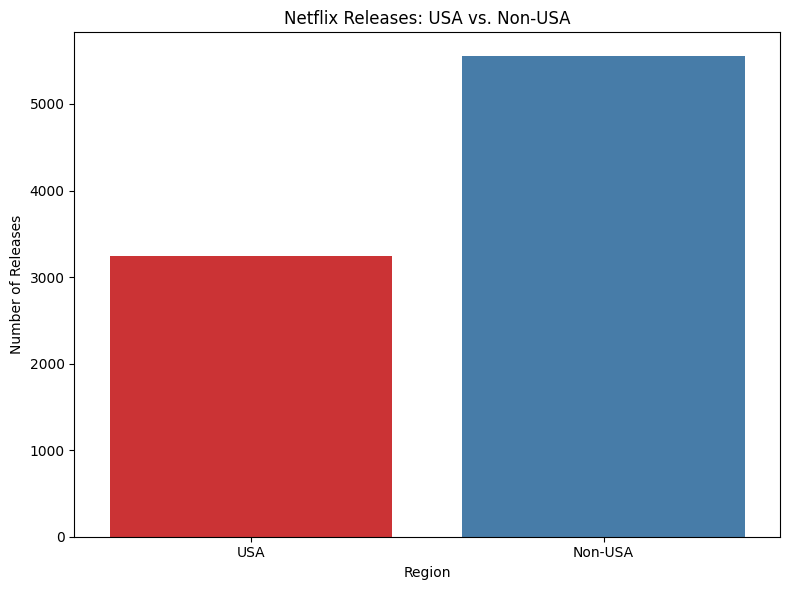

In [108]:
# Compare USA vs non USA

# Group countries into "USA" and "Non-USA"
df['country_group'] = df['country'].apply(lambda x: 'USA' if x == 'United States' else 'Non-USA')

plt.figure(figsize=(8, 6))
sns.countplot(
    data=df,
    x='country_group',
    palette='Set1',
    hue='country_group',
    legend=False
)

plt.xlabel("Region")
plt.ylabel("Number of Releases")
plt.title("Netflix Releases: USA vs. Non-USA")

plt.tight_layout()
plt.show()

USA releases are equal to more than half on non USA releases

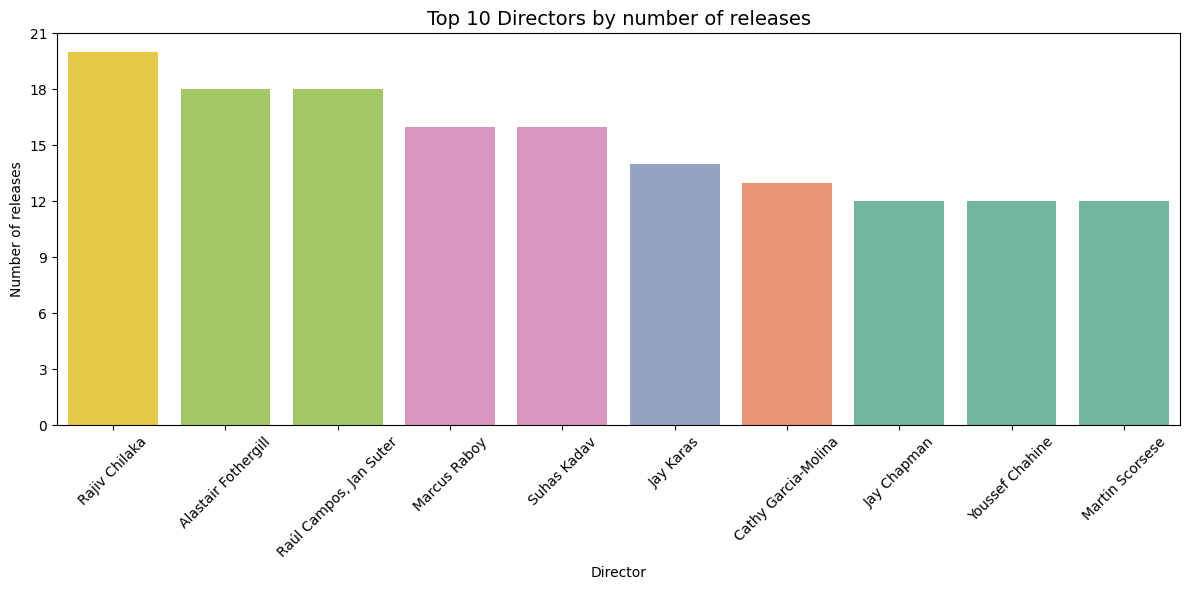

In [109]:
import matplotlib.ticker

# Top 10 directors by number of releases
plt.figure(figsize=(12,6))

# Exclude 'Not Given' and get the top 10 directors
data = df[df['director'] != 'Not Given']['director'].value_counts().head(10)

sns.barplot(
    x=data.index,
    y=data.values,
    palette='Set2',
    hue=data.values,
    legend=False
)

plt.title('Top 10 Directors by number of releases',size=14)
plt.xlabel("Director")
plt.ylabel("Number of releases")
plt.xticks(rotation=45)



plt.gca().yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

Interestingly, the most popular director is Indian, not American

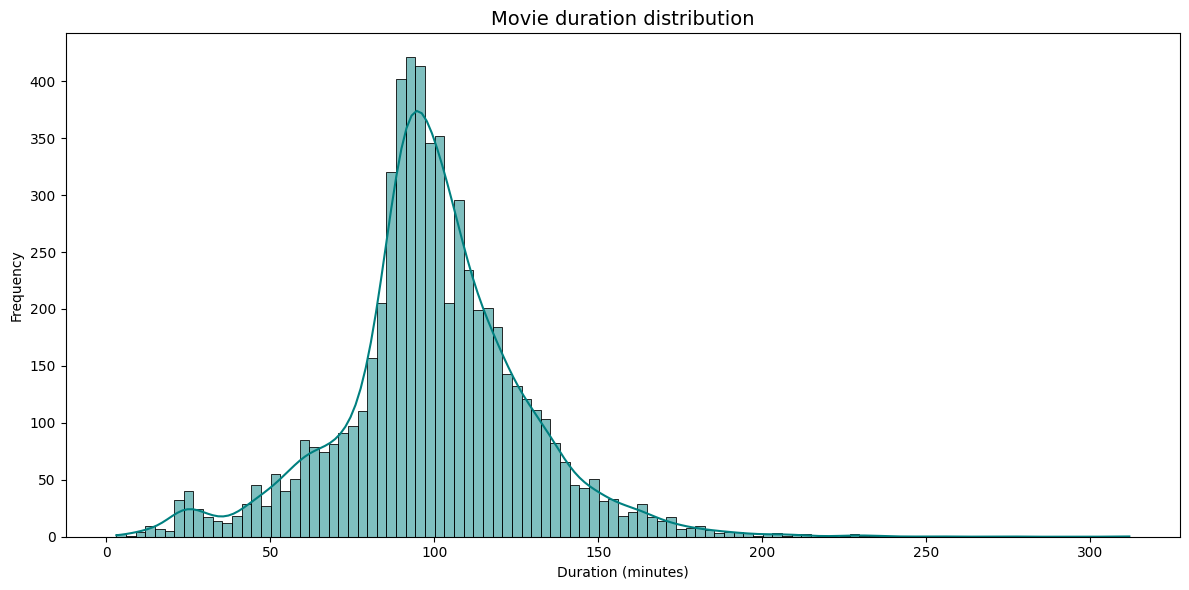

In [110]:
# Movie duration distribution
plt.figure(figsize=(12,6))
sns.histplot(
    data=df,
    x='movie_duration',
    color='teal',
    kde=True
)
plt.title("Movie duration distribution",size=14)
plt.ylabel("Frequency")
plt.xlabel("Duration (minutes)")
plt.tight_layout()
plt.show()

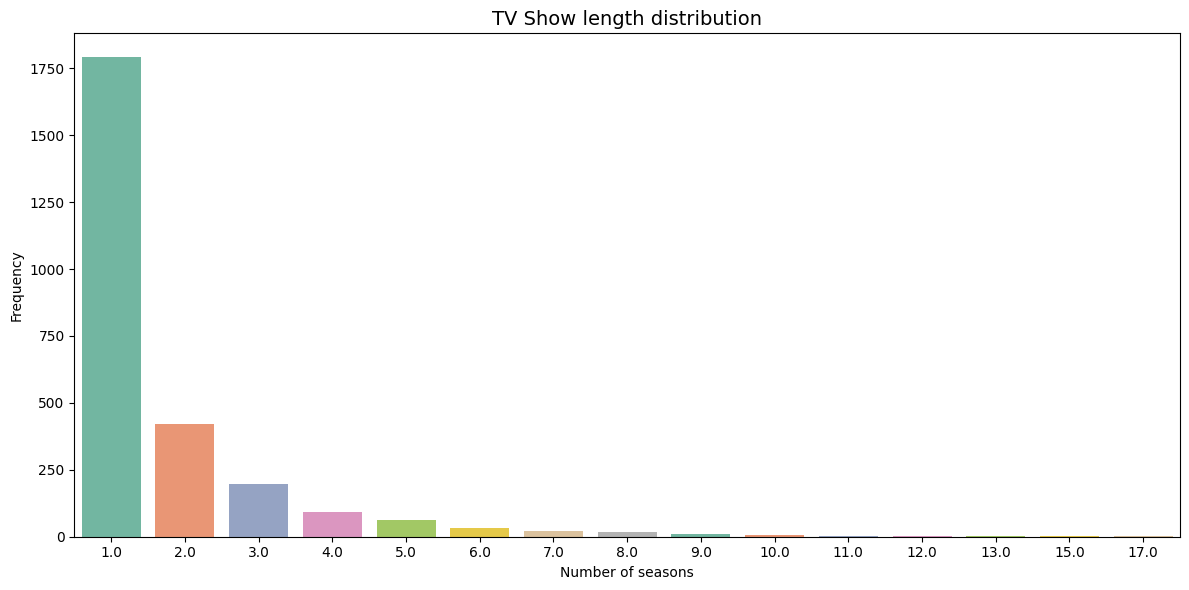

In [111]:
# TV Show length distribution
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='num_seasons',
    palette='Set2',
    hue='num_seasons',
    legend=False
)
plt.title("TV Show length distribution",size=14)
plt.ylabel("Frequency")
plt.xlabel("Number of seasons")
plt.tight_layout()

plt.show()

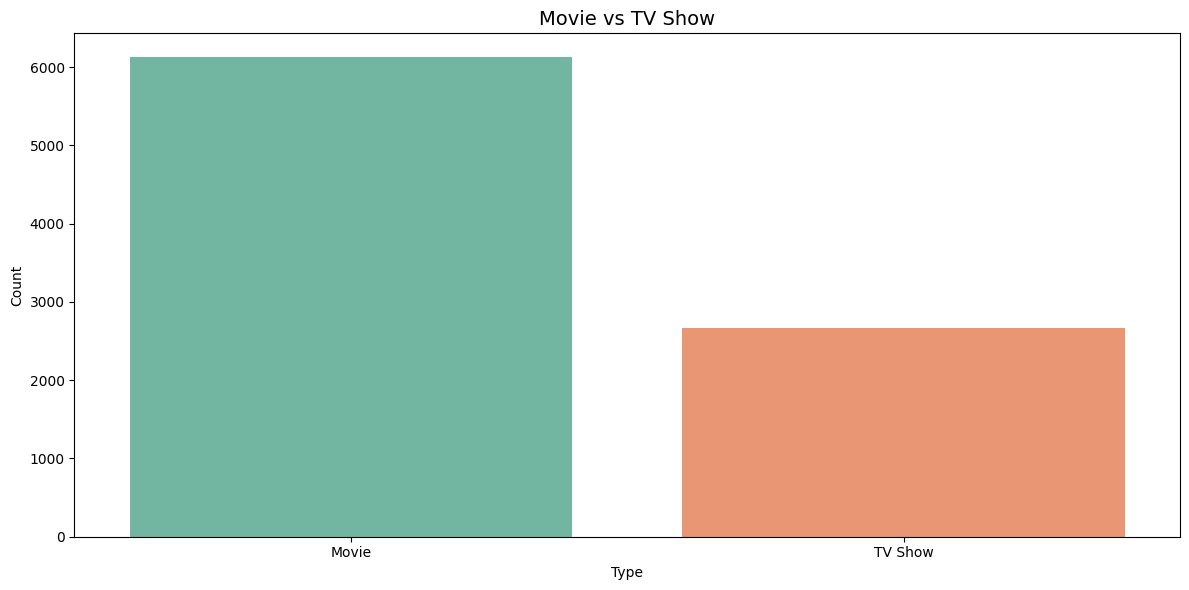

In [112]:
# Number of releases per year
plt.figure(figsize=(12,6))


sns.countplot(
    data=df,
    x='type',
    palette='Set2',
    hue='type',
    legend=False
)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Movie vs TV Show",size=14)
plt.tight_layout()
plt.show()

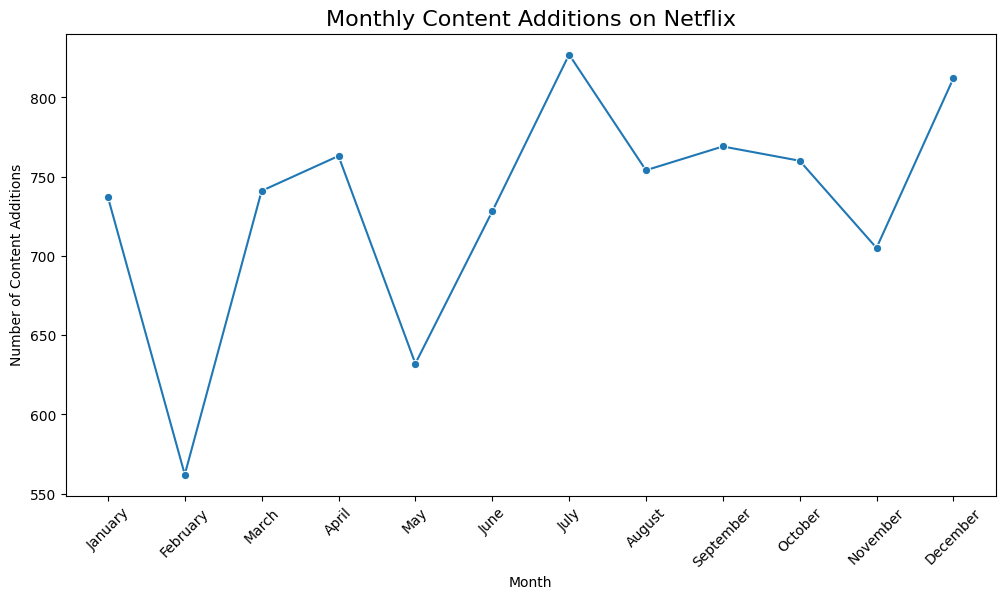

In [113]:
# Extract the month from the date_added column
df['month_added'] = df['date_added'].dt.month

# Group by month and count the values in the title column
monthly_additions = df.groupby('month_added')['title'].count().reset_index(name='count')

# Map month numbers to month names for better readability
month_names = {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June',
    7: 'July', 
    8: 'August',
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}
monthly_additions['month_name'] = monthly_additions['month_added'].map(month_names)

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_additions, 
    x='month_name',
    y='count', 
    marker='o', 
    sort=False)
plt.title('Monthly Content Additions on Netflix',size=16)
plt.xlabel('Month')
plt.ylabel('Number of Content Additions')
plt.xticks(rotation=45)

plt.show()

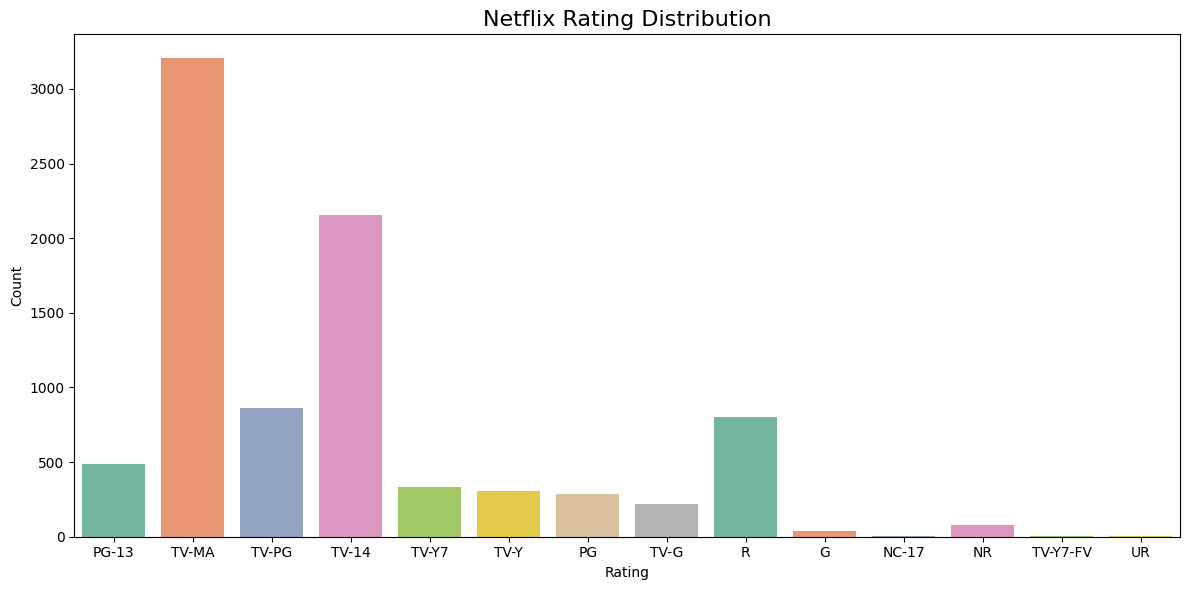

In [114]:
# Rating distribution
plt.figure(figsize=(12,6))

sns.countplot(
    data=df,
    x='rating',
    palette='Set2',
    hue='rating',
    legend=False
)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title("Netflix Rating Distribution",size=16)
plt.tight_layout()
plt.show()

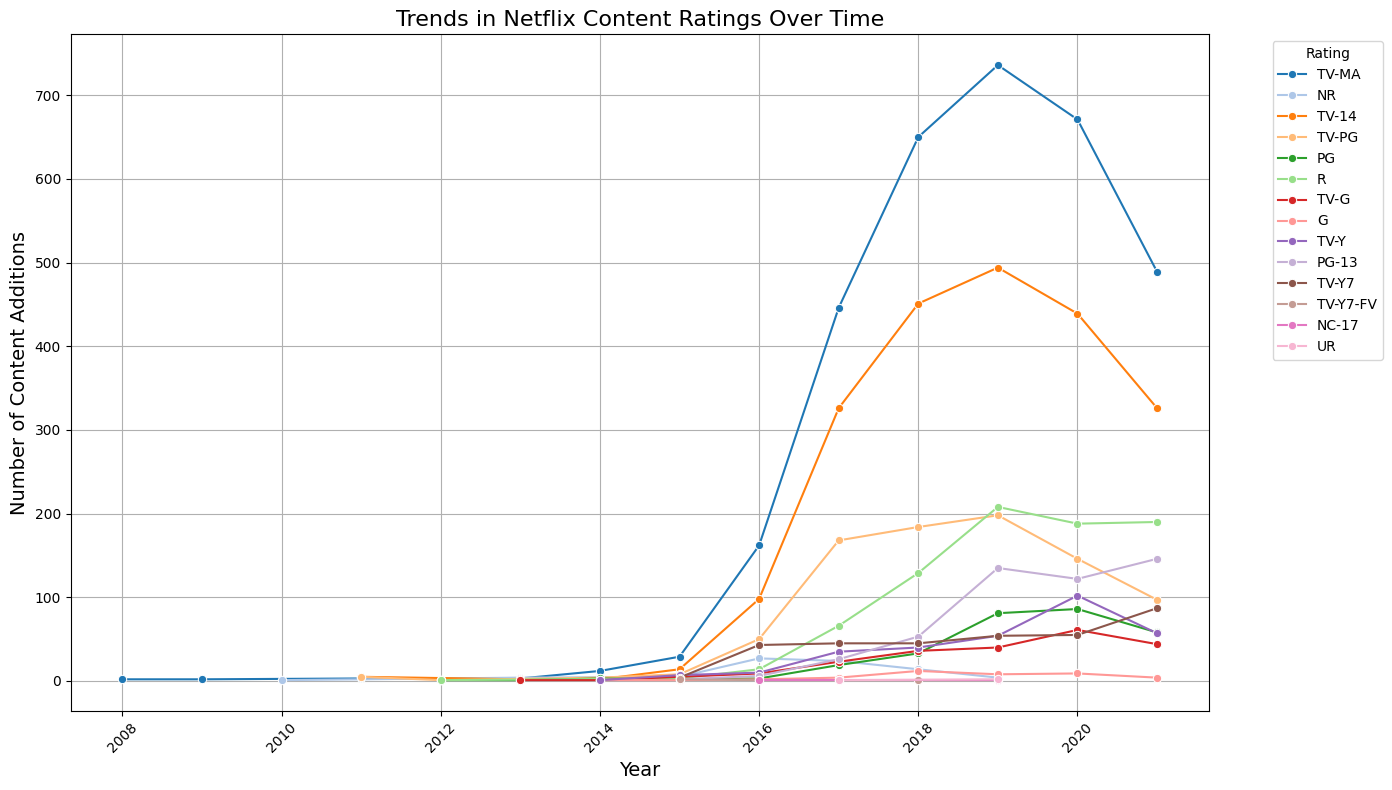

In [115]:
# Extract the year from the 'date_added' column
df['year_added'] = df['date_added'].dt.year

# Group by 'year_added' and 'rating', and count the number of non-missing 'title' values
rating_trends = df.groupby(['year_added', 'rating'])['title'].count().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='year_added', 
    y='count', 
    hue='rating', 
    data=rating_trends, 
    marker='o', 
    palette='tab20' 
)
plt.title('Trends in Netflix Content Ratings Over Time', size=16)
plt.xlabel('Year', size=14)
plt.ylabel('Number of Content Additions', size=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.tight_layout()
plt.show()

In [116]:
# Split the categories into lists
df['category'] = df['category'].str.split(', ')

# Explode the DataFrame to create a new row for each category
df_exploded = df.explode('category')

category_counts = df_exploded[df_exploded['category'].apply(lambda x: 'International' not in x)]['category'].value_counts().head(10)


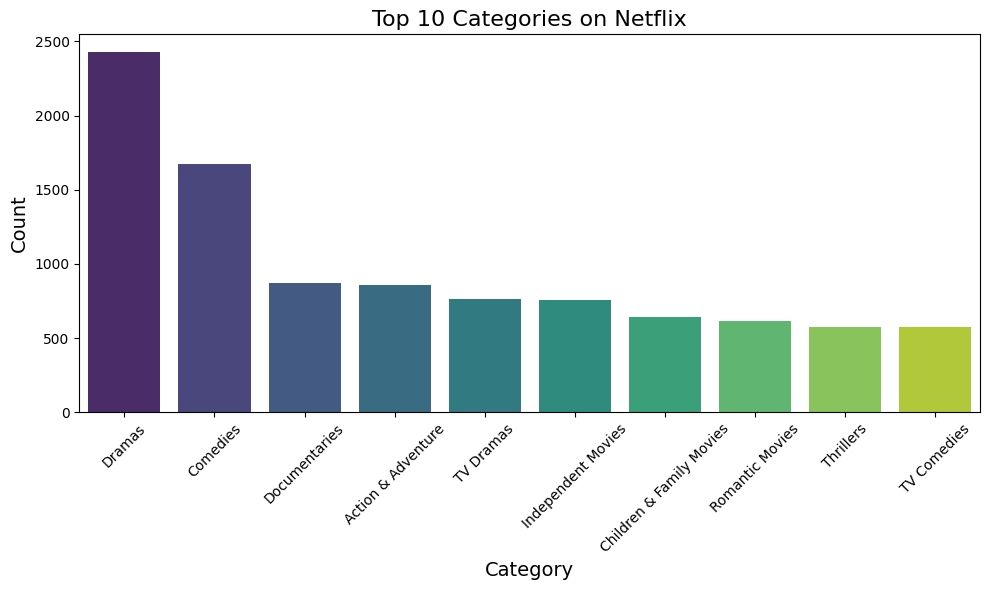

In [117]:
top_10_categories = category_counts.head(10)


plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_10_categories.index, 
    y=top_10_categories.values, 
    palette='viridis',
    hue=top_10_categories.index,
    legend=False
    )
plt.title('Top 10 Categories on Netflix', size=16)
plt.xlabel('Category', size=14)
plt.ylabel('Count', size=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

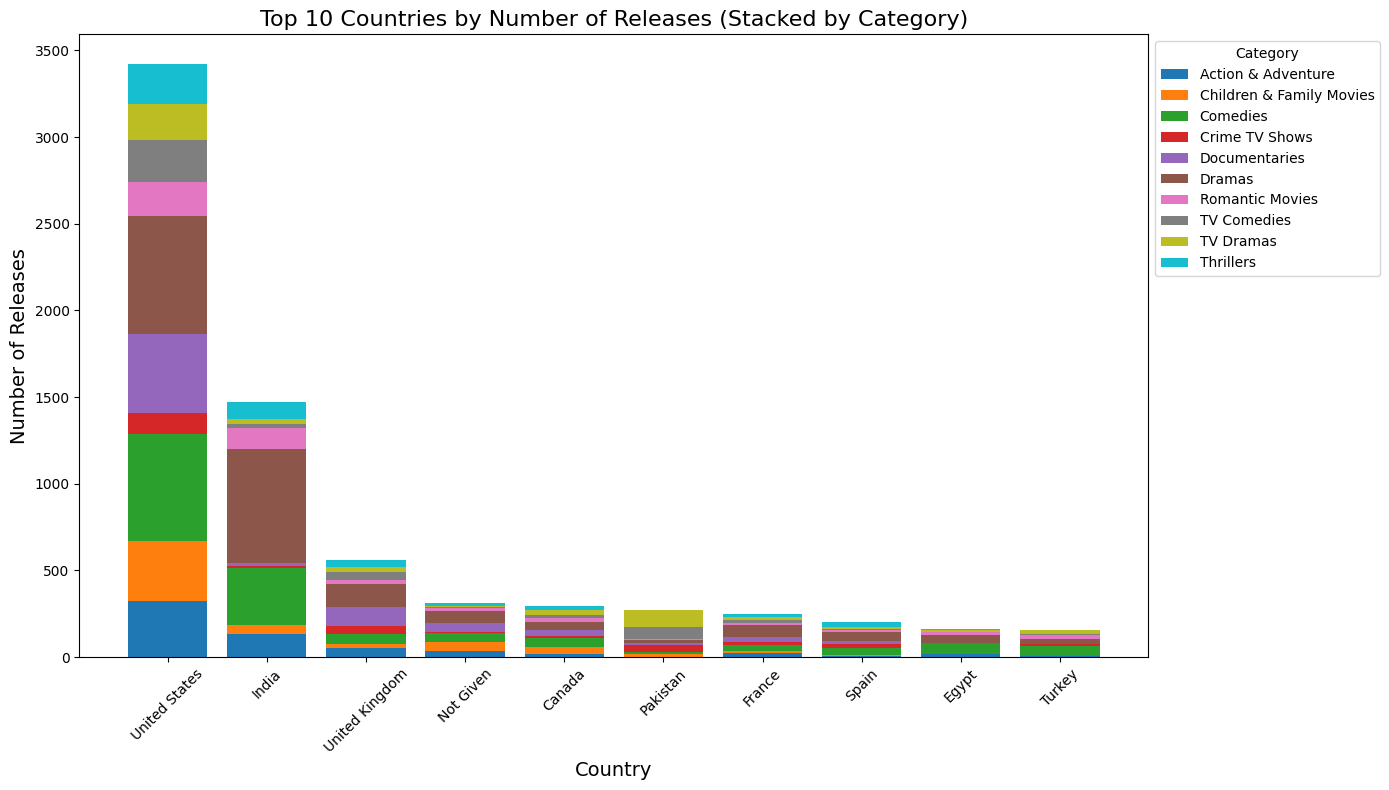

In [123]:
excluded_categories = ["Independent Movies", "International Movies", "International TV Shows"]


df_exploded = df_exploded[~df_exploded['category'].isin(excluded_categories)]
top_10_categories = df_exploded['category'].value_counts().head(10).index

# Filter dataset to include only these top 10 categories
df_filtered = df_exploded[df_exploded['category'].isin(top_10_categories)]

# Count occurrences per (country, category) pair
country_category_counts = df_filtered.groupby(['country', 'category']).size().unstack(fill_value=0)

# Get the top 10 countries by total releases
country_category_counts['total'] = country_category_counts.sum(axis=1)  # Sum across categories
top_10_countries = country_category_counts.nlargest(10, 'total').drop(columns='total')

plt.figure(figsize=(14, 8))

# Stack each category as a separate bar segment
bottom_values = [0] * len(top_10_countries)
colors = plt.cm.tab10.colors  # Use a colormap for distinct colors

for i, category in enumerate(top_10_countries.columns):
    plt.bar(
        top_10_countries.index, 
        top_10_countries[category], 
        bottom=bottom_values, 
        label=category, 
        color=colors[i % len(colors)] 
    )
    bottom_values += top_10_countries[category]  # Update bottom for stacking


plt.title('Top 10 Countries by Number of Releases (Stacked by Category)', size=16)
plt.xlabel('Country', size=14)
plt.ylabel('Number of Releases', size=14)
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()
